*The Extinction Status of Psittaciformes*
================
**This file analyzes the Extinction Status of the order of Psittaciformes (Parrots)**


Research Question:

Investigate if there's a correlation between the physical characteristics of bird species, their natural environments, and their conservation status.

What roles do geographical locations play in the conservation status of bird species?

What roles do geographical locations play in the morphological traits of bird species?

Is there is a relationship between morphological traits and conservation status of bird species?

In [2]:
pip install geopandas matplotlib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd


In [4]:
df = pd.read_csv('./dataset/Psittaciformes.csv',
                 on_bad_lines='skip',
                 encoding='utf-8',
                 dtype=str,  # Read all as string first
                 skip_blank_lines=True,
                 header=0,
                 skipinitialspace=True)

In [5]:
print(df.columns)

Index(['scientificName', 'kingdomName', 'phylumName', 'className', 'orderName',
       'familyName', 'genusName', 'speciesName', 'redlistCategory',
       'redlistCriteria', 'yearPublished', 'assessmentDate', 'criteriaVersion',
       'language', 'populationTrend', 'systems', 'realm', 'yearLastSeen',
       'possiblyExtinct', 'possiblyExtinctInTheWild', 'scopes', 'Sequence',
       'Avibase.ID1', 'Total.individuals', 'Female', 'Male', 'Unknown',
       'Complete.measures', 'Beak.Length_Culmen', 'Beak.Length_Nares',
       'Beak.Width', 'Beak.Depth', 'Tarsus.Length', 'Wing.Length',
       'Kipps.Distance', 'Secondary1', 'Hand-Wing.Index', 'Tail.Length',
       'Mass', 'Mass.Source', 'Mass.Refs.Other', 'Inference',
       'Traits.inferred', 'Reference.species', 'Habitat', 'Habitat.Density',
       'Migration', 'Trophic.Level', 'Trophic.Niche', 'Primary.Lifestyle',
       'Min.Latitude', 'Max.Latitude', 'Centroid.Latitude',
       'Centroid.Longitude', 'Range.Size', 'internalTaxonId_x', '

In [6]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
print(df['redlistCategory'].unique())

['Endangered' 'Least Concern' 'Near Threatened' 'Vulnerable'
 'Critically Endangered' 'Extinct in the Wild']


In [7]:
print(df['possiblyExtinct'].unique())

['FALSE' 'TRUE']


In [8]:
print(df['redlistCriteria'].unique())

['B1ab(i,ii,iii,iv,v)' nan 'B1b(iii)' 'B1b(iii,v)c(ii,iii); C2a(i)'
 'C2a(ii)' 'B1ab(iii)' 'A2cd; C2a(ii)' 'A2cd+3cd+4cd; C1'
 'A2cd+3cd+4cd;B1ab(i,ii,iii,v);C2a(i)' 'B1ab(ii,iii,v);C2a(ii)'
 'A2cd+3cd+4cd' 'A2cd+3cd+4cd; C2a(ii)' 'A2bcd' 'B1ab(ii,v); C2a(i)'
 'A2bcd+3bcd+4bcd' 'C2a(i)' 'B2ab(i,ii,iii,iv,v); C2a(i)' 'A2be+4be'
 'C2a(i,ii); D' 'A3ce' 'A2bce' 'A2ace; C2a(i,ii); D' 'C1' 'B1ab(i,iii)'
 'B1b(ii,iii,v)' 'B1ab(ii,iii)' 'D1' 'D' 'B1ab(ii,iii,v)'
 'B1a+2a; C2a(ii)' 'B1ab(ii,iii,iv)+2ab(ii,iii,iv)' 'A4abcd'
 'A2d+3d+4d; C2a(i)' 'B2ab(iii)' 'A2bcd+4bcd'
 'A2cd+3cd+4cd; B1b(ii,iii,v)' 'A2bd' 'A3cd' 'A2cd' 'D2' 'D1+2'
 'A4acd; C1+2a(i,ii); D' 'A2cd+3cd+4cd; C2a(i)' 'A4acd' 'A3cde+4acde'
 'B1ab(iii); D' 'A2cd+4cd' 'C1+2a(i)' 'A1abcde' 'A3cd; C1+2a(i)'
 'A2c+3c+4c' 'B2ab(ii,iii,iv,v)' 'A3d+4d' 'B1ab(iii)+2ab(iii)' 'A3cd+4cd'
 'A2acd+3cde' 'A3c+4c' 'B1ab(iii,v)' 'A2bcde+3cde+4bcde' 'A2bc+3bc+4bc'
 'A2bc+4bc' 'B1b(iii,v)+2b(iii,v)' 'A2bc+3c+4bc' 'A2ce' 'A3cde+4cde'
 'B1b(iii)+2b(iii)' 

In [9]:
print(df['Habitat'].unique())

['Forest' 'Woodland' 'Grassland' 'Shrubland' 'Human Modified' nan 'Desert']


In [10]:
print(df['threats'].unique())
df['threats'].to_csv('threats.csv', index=False)


['Trade represents a significant and on-going threat to the species. It was widely trapped as early as the 19th century. In 1999, research suggested that as many as 1,000-2,000 birds were being taken from Karakelang each year, 80% (illegally) to the Philippines. This is compounded by the extensive loss of forest, perhaps the main factor underlying its disappearance from Sangihe. The reasons behind habitat loss are small-holder agricultural encroachment into primary forest and (illegal) commercial logging. Furthermore, in 2003 there were plans to develop a commercial banana plantation on Karakelang <strong></strong>(Riley 2003). The use of insecticides and the transmission of disease via escaped cage-birds to wild populations, have been identified as a further potential hazards. <p></p>'
 nan
 'Its preferred habitat is relatively unlikely to be affected by human activities in the medium term, but logging and trapping must remain a concern. As a species of montane areas, it is potentiall

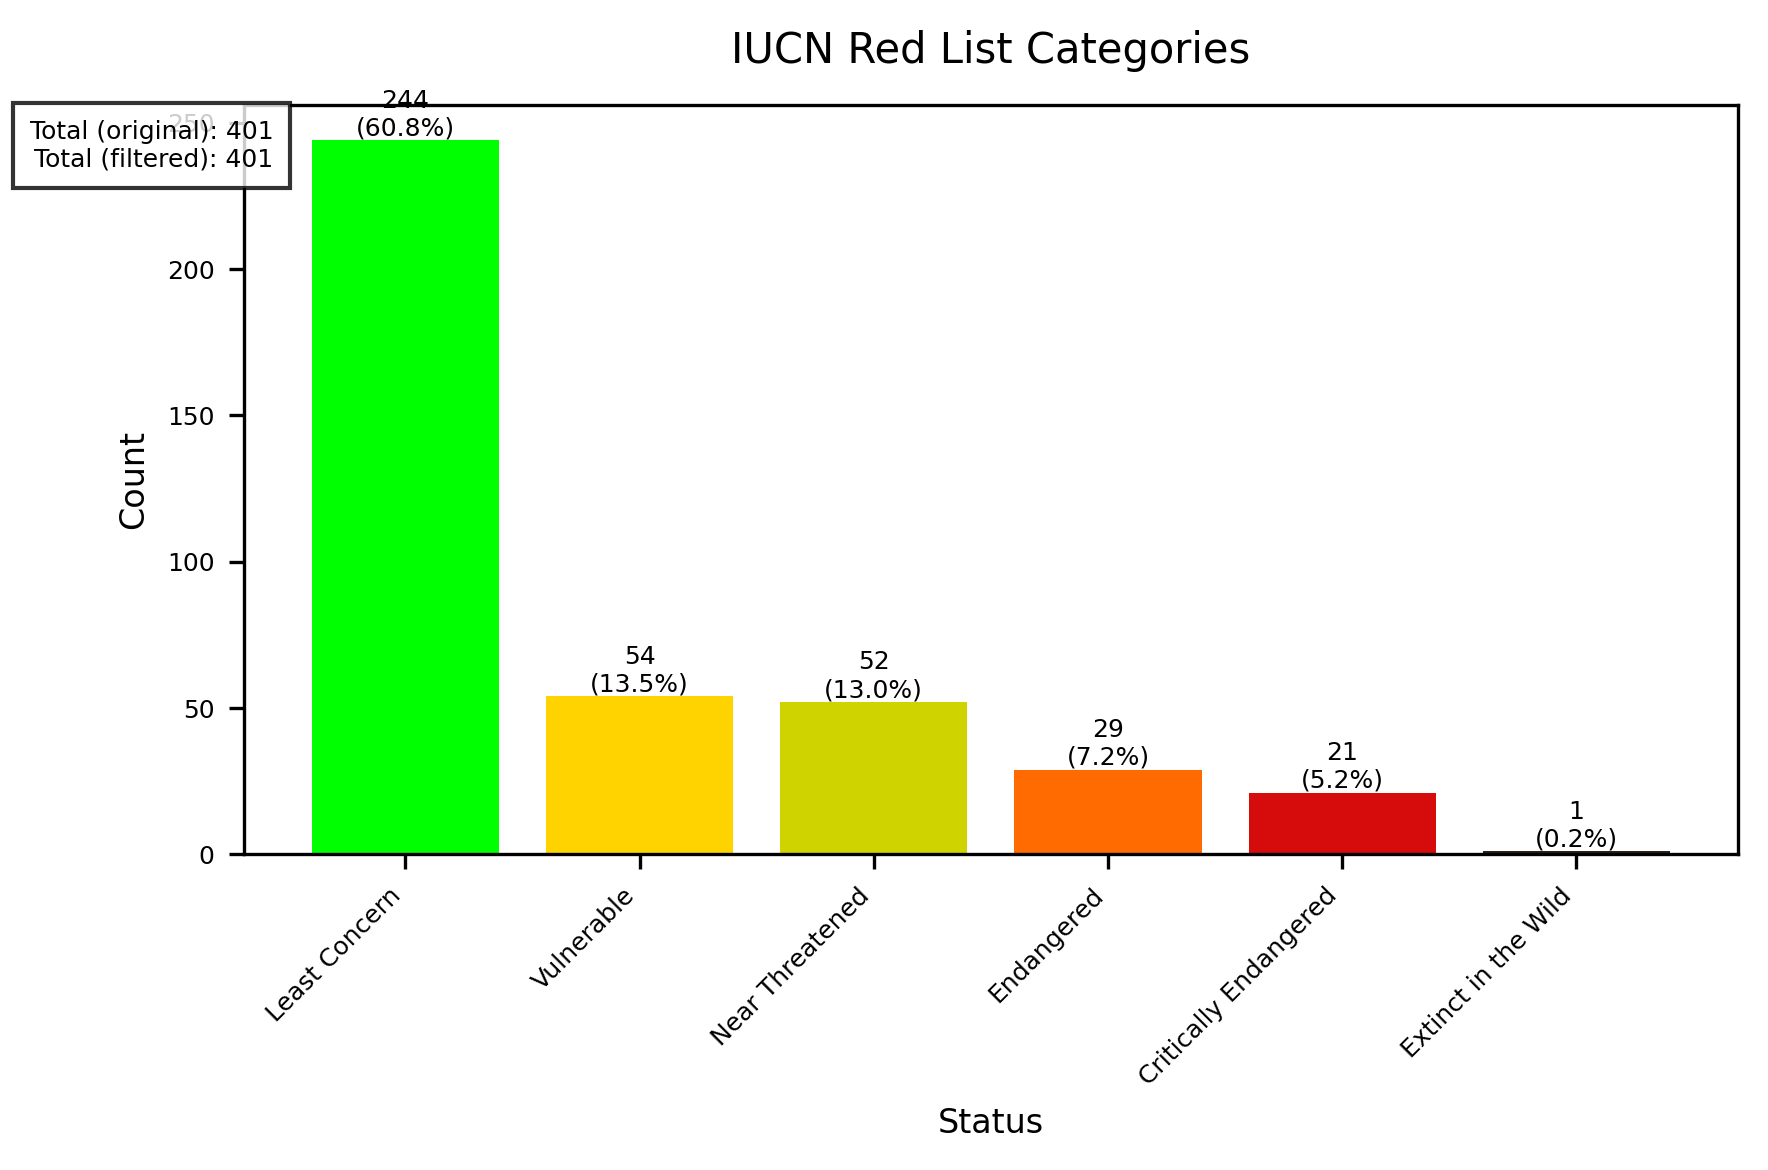

In [11]:
def plot_redlist_distribution(df, figsize=(6, 4), dpi=300):
    """
    Creates a histogram/distribution plot of Red List categories with smaller dimensions
    """
    # Define valid categories and filter
    valid_categories = [
        'Least Concern',
        'Vulnerable',
        'Endangered',
        'Critically Endangered',
        'Extinct in the Wild',
        'Near Threatened',
        'Extinct'
    ]

    df_filtered = df[df['redlistCategory'].isin(valid_categories)]

    # Define IUCN Red List colors
    colors = {
        'Least Concern': '#00FF00',        # Green
        'Vulnerable': '#FFD300',# Yellow
        'Near Threatened': '#CFD300',
        'Endangered': '#FF6B00',           # Orange
        'Critically Endangered': '#D60B0B', # Red
        'Extinct in the Wild': '#2D1F15',  # Dark Brown
        'Extinct': '#000000',              # Black
    }

    # Calculate value counts and percentages
    counts = df_filtered['redlistCategory'].value_counts()
    total_filtered = len(df_filtered)
    total_original = len(df)

    # Create figure with smaller size
    plt.figure(figsize=figsize, dpi=dpi)

    # Create bar plot
    bars = plt.bar(range(len(counts)), counts,
                  color=[colors.get(x, '#808080') for x in counts.index])

    # Customize plot with smaller font sizes
    plt.title('IUCN Red List Categories', pad=10, fontsize=10)
    plt.xlabel('Status', fontsize=8)
    plt.ylabel('Count', fontsize=8)

    # Rotate x-axis labels with smaller font
    plt.xticks(range(len(counts)), counts.index, rotation=45, ha='right', fontsize=6)
    plt.yticks(fontsize=6)

    # Add count labels with smaller font
    for bar in bars:
        height = bar.get_height()
        percentage = (height/total_filtered) * 100
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}\n({percentage:.1f}%)',
                ha='center', va='bottom', fontsize=6)

    # Add both totals to upper right
    plt.text(0.02, 0.98,
             f'Total (original): {total_original:,}\nTotal (filtered): {total_filtered:,}',
             transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.8),
             verticalalignment='top',
             horizontalalignment='right',
             fontsize=6)

    plt.tight_layout()

    return plt.gcf()

# Usage:
fig = plot_redlist_distribution(df)
plt.show()


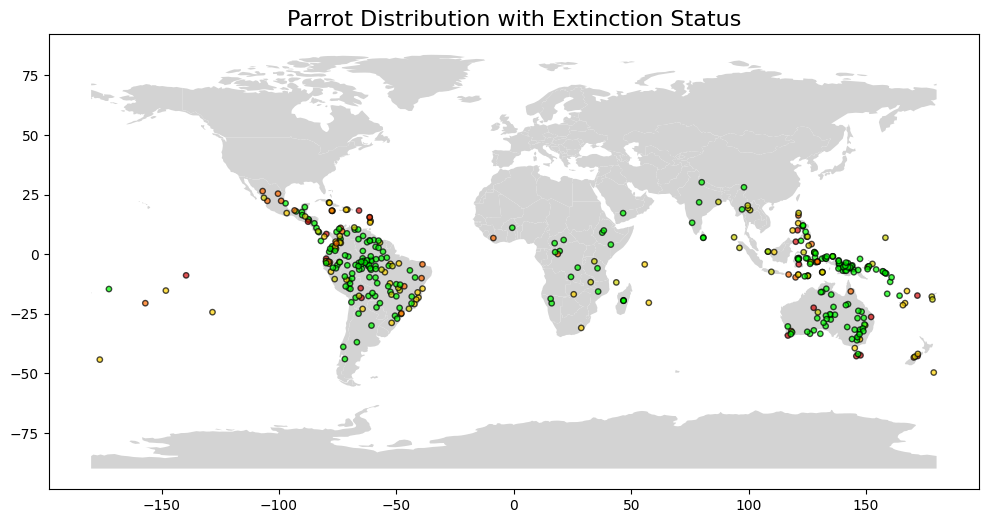

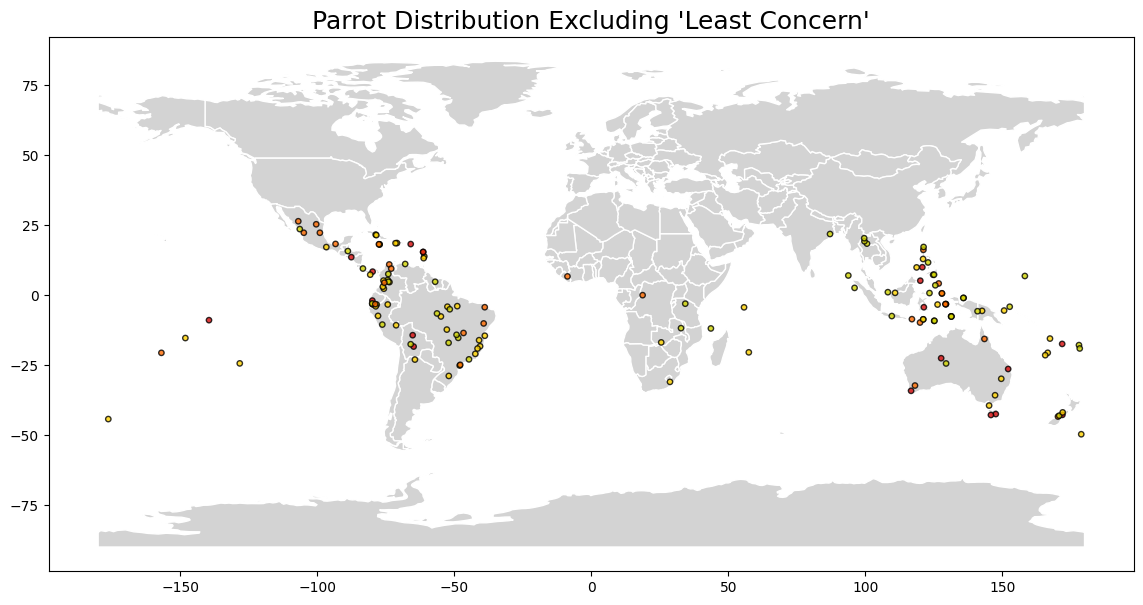

In [12]:
# Replace this path with the location of your downloaded Natural Earth shapefile
world_shapefile_path = "./ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"

# Load the world shapefile
world = gpd.read_file(world_shapefile_path)

# Filter relevant columns for the map
columns_needed = ['scientificName', 'Centroid.Latitude', 'Centroid.Longitude', 'redlistCategory']
map_data = df[columns_needed].dropna()

# Define colors for extinction status
colors = {
    'Least Concern': '#00FF00',        
    'Vulnerable': '#FFD300',          
    'Near Threatened': '#CFD300',
    'Endangered': '#FF6B00',          
    'Critically Endangered': '#D60B0B',
    'Extinct in the Wild': '#2D1F15',  
    'Extinct': '#000000',              
}

# Assign colors based on 'redlistCategory'
map_data['color'] = map_data['redlistCategory'].map(colors)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(
    map_data, 
    geometry=gpd.points_from_xy(map_data['Centroid.Longitude'], map_data['Centroid.Latitude']),
    crs="EPSG:4326"
)

# Plot the map
fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color='lightgrey')

gdf.plot(ax=ax, color=gdf['color'], markersize=15, edgecolor='black', alpha=0.7)

# Add title
plt.title("Parrot Distribution with Extinction Status", fontsize=16)
plt.show()

# Exclude rows where 'redlistCategory' is 'Least Concern'
map_data = map_data[map_data['redlistCategory'] != 'Least Concern']

# Assign colors based on 'redlistCategory'
map_data['color'] = map_data['redlistCategory'].map(colors)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(
    map_data, 
    geometry=gpd.points_from_xy(map_data['Centroid.Longitude'], map_data['Centroid.Latitude']),
    crs="EPSG:4326"
)

# Plot the map
fig, ax = plt.subplots(figsize=(14, 10))
world.plot(ax=ax, color='lightgrey', edgecolor='white')

gdf.plot(ax=ax, color=gdf['color'], markersize=15, edgecolor='black', alpha=0.8)

# Add title
plt.title("Parrot Distribution Excluding 'Least Concern'", fontsize=18)
plt.show()


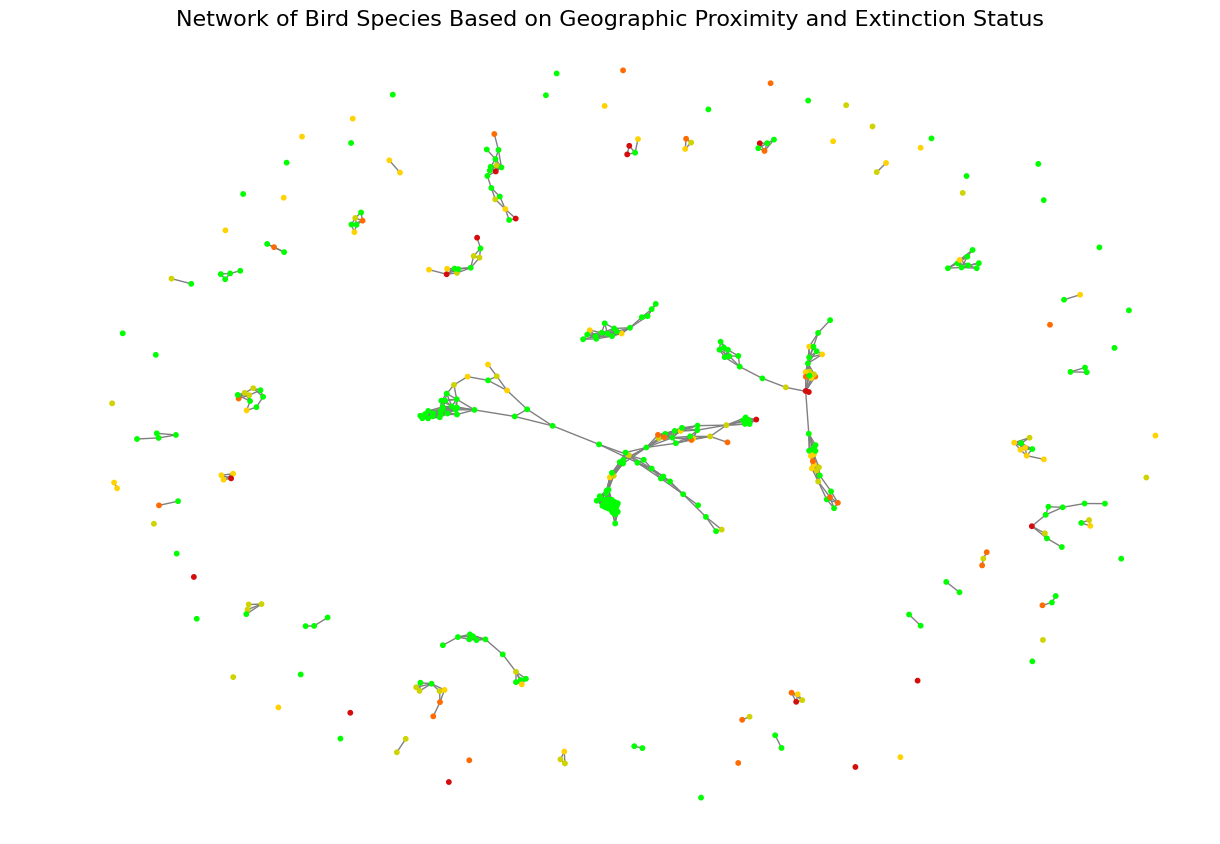

In [13]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Filter relevant columns and convert latitude/longitude to numeric
columns_needed = ['scientificName', 'Centroid.Latitude', 'Centroid.Longitude', 'redlistCategory']
network_data = df[columns_needed].dropna()

network_data['Centroid.Latitude'] = pd.to_numeric(network_data['Centroid.Latitude'], errors='coerce')
network_data['Centroid.Longitude'] = pd.to_numeric(network_data['Centroid.Longitude'], errors='coerce')

# Drop rows with NaN values after conversion
network_data = network_data.dropna()

# Define colors for extinction status
colors = {
    'Least Concern': '#00FF00',        
    'Vulnerable': '#FFD300',          
    'Near Threatened': '#CFD300',
    'Endangered': '#FF6B00',          
    'Critically Endangered': '#D60B0B',
    'Extinct in the Wild': '#2D1F15',  
    'Extinct': '#000000',              
}

# Initialize graph
G = nx.Graph()

# Add nodes for each bird with color based on extinction status
for _, row in network_data.iterrows():
    G.add_node(row['scientificName'], color=colors[row['redlistCategory']])

# Add edges based on geographic proximity (difference in latitude and longitude < 10)
for i, row1 in network_data.iterrows():
    for j, row2 in network_data.iterrows():
        if i < j:  # Avoid duplicate comparisons and self-loops
            lat_diff = abs(row1['Centroid.Latitude'] - row2['Centroid.Latitude'])
            lon_diff = abs(row1['Centroid.Longitude'] - row2['Centroid.Longitude'])
            if lat_diff < 3 and lon_diff < 3:
                G.add_edge(row1['scientificName'], row2['scientificName'])

# Visualize the network
node_colors = [G.nodes[node]['color'] for node in G.nodes()]
pos = nx.spring_layout(G)  # Compute layout for visualization

plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=False, node_color=node_colors, edge_color='gray', font_size=10, font_weight='bold', node_size=10)
plt.title("Network of Bird Species Based on Geographic Proximity and Extinction Status", fontsize=16)
plt.show()


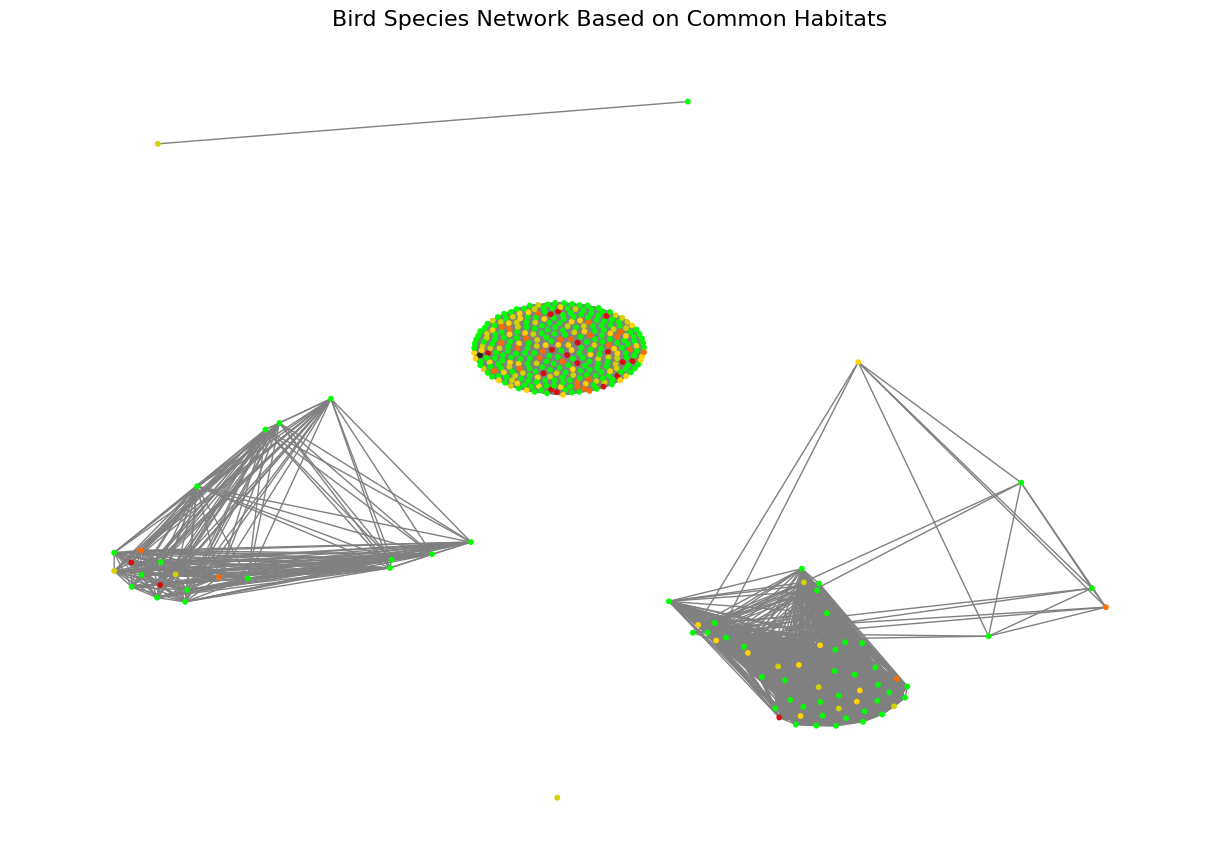

In [14]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Filter relevant columns and convert latitude/longitude to numeric
columns_needed = ['scientificName', 'Habitat', 'redlistCategory']
network_data = df[columns_needed].dropna()

# Drop rows with NaN values after conversion
network_data = network_data.dropna()

# Define colors for extinction status
colors = {
    'Least Concern': '#00FF00',        
    'Vulnerable': '#FFD300',          
    'Near Threatened': '#CFD300',
    'Endangered': '#FF6B00',          
    'Critically Endangered': '#D60B0B',
    'Extinct in the Wild': '#2D1F15',  
    'Extinct': '#000000',              
}

# Initialize graph
G = nx.Graph()

# Add nodes for each bird with color based on extinction status
for _, row in network_data.iterrows():
    G.add_node(row['scientificName'], color=colors[row['redlistCategory']])

# Add edges based on geographic proximity (difference in latitude and longitude < 10)
for i, row1 in network_data.iterrows():
    for j, row2 in network_data.iterrows():
        if i < j:  # Avoid duplicate comparisons and self-loops
            if row1['Habitat'] == row2['Habitat']:
                G.add_edge(row1['scientificName'], row2['scientificName'])

# Visualize the network
node_colors = [G.nodes[node]['color'] for node in G.nodes()]
pos = nx.spring_layout(G, k=0.8, iterations=100)  # Compute layout for visualization

plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=False, node_color=node_colors, edge_color='gray', font_size=10, font_weight='bold', node_size=10)
plt.title("Bird Species Network Based on Common Habitats", fontsize=16)
plt.show()

In [15]:
categories = {
    'Trade': ['trade'],
    'Habitat Loss': ['habitat', 'loss', 'forest', 'areas'],
    'Climate Change': ['cyclones', 'natural', 'climate'],
    'Diseases': ['avian', 'malaria'],
    'Predation': ['predators'],
    'Human Activity': ['hunting', 'logging', 'agriculture'],
    'Pollution': ['pollution'],
}


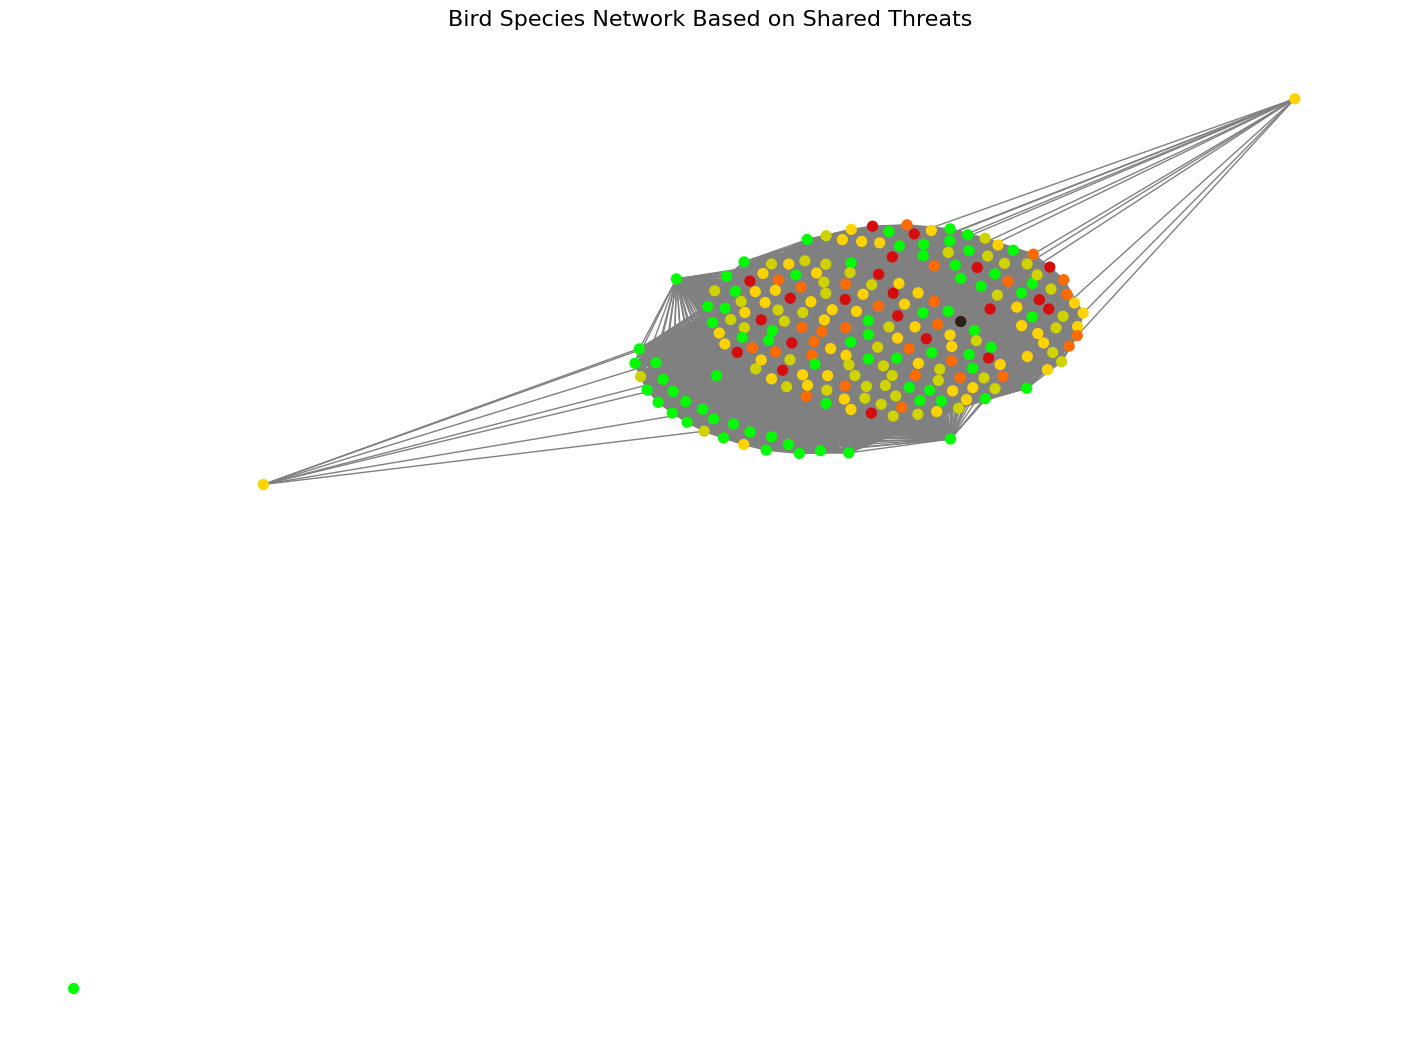

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

# Filter relevant columns and convert extinction status to color-coded categories
columns_needed = ['scientificName', 'threats', 'redlistCategory']
network_data = df[columns_needed].dropna()

# Define colors for extinction status
colors = {
    'Least Concern': '#00FF00',        
    'Vulnerable': '#FFD300',          
    'Near Threatened': '#CFD300',
    'Endangered': '#FF6B00',          
    'Critically Endangered': '#D60B0B',
    'Extinct in the Wild': '#2D1F15',  
    'Extinct': '#000000',              
}

# Initialize the graph
G = nx.Graph()

def categorize_threat(threat, category_keywords):
    return any(keyword in threat.lower() for keyword in category_keywords)

# Add nodes for each bird with color based on extinction status
for _, row in network_data.iterrows():
    G.add_node(row['scientificName'], color=colors[row['redlistCategory']])

# Add edges if two birds share at least one common threat
for i, row1 in network_data.iterrows():
    for j, row2 in network_data.iterrows():
        if i < j:  # Avoid duplicate comparisons and self-loops
            threats1 = set()
            for category, keywords in categories.items():
                if categorize_threat(row1['threats'], keywords):
                    threats1.add(category)

            threats2 = set()
            for category, keywords in categories.items():
                if categorize_threat(row2['threats'], keywords):
                    threats2.add(category)
            # Check if there is at least one common threat
            common_threats = threats1.intersection(threats2)
            if common_threats:
                G.add_edge(row1['scientificName'], row2['scientificName'])


# Visualize the network
node_colors = [G.nodes[node]['color'] for node in G.nodes()]
pos = nx.spring_layout(G, k=0.8, iterations=100)  # Compute layout for visualization

plt.figure(figsize=(14, 10))
nx.draw(G, pos, with_labels=False, node_color=node_colors, edge_color='gray', font_size=10, font_weight='bold', node_size=50)
plt.title("Bird Species Network Based on Shared Threats", fontsize=16)
plt.show()
